In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [20]:
df=pd.read_csv('/home/ahmedsta/Desktop/engineer/STA/DATA-SCIENCE/data/combined_data.csv')
df.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year,league
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,20.0,4.0,0.0,0.0,1,2,2,1,2014,english
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,9.0,1.0,0.0,0.0,2,2,2,2,2014,english
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,10.0,1.0,0.0,0.0,2,2,2,2,2014,english
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,10.0,0.0,0.0,1.0,0,1,1,0,2014,english
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,10.0,2.0,0.0,0.0,0,1,1,0,2014,english


In [21]:
df.shape

(12062, 42)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12062 entries, 0 to 12061
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     12062 non-null  int64  
 1   Home Team                      12062 non-null  object 
 2   Away Team                      12062 non-null  object 
 3   Score                          12062 non-null  object 
 4   Half Time Score                12062 non-null  object 
 5   Match Excitement               12062 non-null  float64
 6   Home Team Rating               12062 non-null  float64
 7   Away Team Rating               12062 non-null  float64
 8   Home Team Possession %         12062 non-null  int64  
 9   Away Team Possession %         12062 non-null  int64  
 10  Home Team Off Target Shots     12062 non-null  float64
 11  Home Team On Target Shots      12062 non-null  float64
 12  Home Team Total Shots          12062 non-null 

In [23]:
df.describe().iloc[:,20:35]

,Away Team On Target Shots,Away Team Total Shots,Away Team Blocked Shots,Away Team Corners,Away Team Throw Ins,Away Team Pass Success %,Away Team Aerials Won,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded
count,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000,12062.000000
mean,3.883518,11.207014,2.731222,4.473885,21.480517,77.477367,16.741917,22.792323,13.083154,2.162245,0.060852,0.057785,1.531172,1.206351,1.206351
std,2.271793,4.655801,1.997524,2.617907,6.224558,7.572808,7.112103,10.141781,4.205046,1.365581,0.244216,0.243772,1.305178,1.168266,1.168266
min,0.000000,0.000000,0.000000,0.000000,3.000000,41.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,8.000000,1.000000,3.000000,17.000000,73.000000,12.000000,15.000000,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,4.000000,11.000000,2.000000,4.000000,21.000000,78.000000,16.000000,22.000000,13.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,5.000000,14.000000,4.000000,6.000000,25.000000,83.000000,21.000000,29.000000,16.000000,3.000000,0.000000,0.000000,2.000000,2.000000,2.000000
max,15.000000,39.000000,16.000000,32.000000,52.000000,95.000000,53.000000,79.000000,32.000000,9.000000,2.000000,2.000000,10.000000,9.000000,9.000000


In [24]:
df.corr()


,Unnamed: 0,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
Unnamed: 0,1.000000,0.021738,-0.056163,-0.060480,-0.008272,0.008272,0.021108,0.010985,-0.021132,-0.088607,...,-0.199002,0.197678,0.221781,0.059898,-0.004215,0.009071,0.006322,0.006322,0.009071,0.207623
Match Excitement,0.021738,1.000000,0.028592,-0.054983,0.026300,-0.026300,0.054529,0.458823,0.286152,0.075568,...,-0.072215,-0.066035,0.011678,0.045653,0.049135,0.590668,0.594199,0.594199,0.590668,0.046679
Home Team Rating,-0.056163,0.028592,1.000000,-0.859539,0.237670,-0.237670,0.069091,0.577016,0.343769,0.058138,...,-0.083875,-0.056134,-0.019806,0.036052,0.091777,0.685740,-0.637999,-0.637999,0.685740,-0.081585
Away Team Rating,-0.060480,-0.054983,-0.859539,1.000000,-0.222349,0.222349,-0.100018,-0.561851,-0.339169,-0.026498,...,0.073001,-0.075470,-0.132545,-0.136278,-0.176407,-0.674064,0.633419,0.633419,-0.674064,0.005214
Home Team Possession %,-0.008272,0.026300,0.237670,-0.222349,1.000000,-1.000000,0.349065,0.318272,0.485897,0.337720,...,0.390210,0.084500,0.061299,0.053253,0.068384,0.142558,-0.122044,-0.122044,0.142558,-0.013801
Away Team Possession %,0.008272,-0.026300,-0.237670,0.222349,-1.000000,1.000000,-0.349065,-0.318272,-0.485897,-0.337720,...,-0.390210,-0.084500,-0.061299,-0.053253,-0.068384,-0.142558,0.122044,0.122044,-0.142558,0.013801
Home Team Off Target Shots,0.021108,0.054529,0.069091,-0.100018,0.349065,-0.349065,1.000000,0.175003,0.735001,0.279136,...,0.294041,0.001756,0.034402,0.044313,0.060271,-0.015080,-0.044339,-0.044339,-0.015080,-0.064359
Home Team On Target Shots,0.010985,0.458823,0.577016,-0.561851,0.318272,-0.318272,0.175003,1.000000,0.659871,0.181727,...,0.060470,-0.056051,0.005023,0.055998,0.079455,0.592951,-0.108079,-0.108079,0.592951,-0.013136
Home Team Total Shots,-0.021132,0.286152,0.343769,-0.339169,0.485897,-0.485897,0.735001,0.659871,1.000000,0.666085,...,0.327763,-0.045390,0.022878,0.064475,0.083501,0.274178,-0.081307,-0.081307,0.274178,-0.042873
Home Team Blocked Shots,-0.088607,0.075568,0.058138,-0.026498,0.337720,-0.337720,0.279136,0.181727,0.666085,1.000000,...,0.332561,-0.043362,0.003447,0.031818,0.030138,-0.018091,-0.011484,-0.011484,-0.018091,-0.006376


In [25]:
winner=[]
diffgoals=[]
for i in range (df.Score.count()):
    if (df.iloc[i,36]>df.iloc[i,38]):
        winner.append(1)
    elif(df.iloc[i,36]<df.iloc[i,38]):
        winner.append(-1)
    else :
        winner.append(0)
    diffgoals.append((df.iloc[i,36])-(df.iloc[i,38]))
df['winner']=winner
df['difference of goals']=diffgoals



In [26]:
L=['english','french','german','italian','spanish']
Y=[2014,2015,2016,2017,2018,2019,2020]
D={}
for l in L:
    for y in Y:
        D[(l,y)]=df.loc[df['year']==y].loc[df['league']==l]

# add features


In [84]:
#previous match 
PR={}
for l in L :
    for y in Y:
        K=list(D[(l,y)].groupby('Home Team').groups.keys())
        for k in K:
            A=tuple(D[(l,y)].loc[(D[(l,y)]['Home Team']==k)].winner)
            A1=tuple(np.array(D[(l,y)].loc[(D[(l,y)]['Away Team']==k)].winner)*(-1))
            PR[(l,y,k)]=A+A1
print(PR[('english',2014,'ARSENAL')])
        

(1, 0, 0, 0, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, -1, 1, 0, 0, 1, -1, 1, -1, 1, -1, 0, 1, -1, 1, -1, 1, 1, 1, 1, 1, 0)


In [28]:
#how the result of last 5 matches can effect the 6th
#this cell will calculate the probability of winning or defeat or null depending on the results of 5 previous games


BL={}
BR={}

for a in range(-1,2):
    for b in range(-1,2):
        for c in range(-1,2):
            for d in range(-1,2):
                for e in range(-1,2):
                    for f in range(-1,2):
                        BL[(a,b,c,d,e,f)]=0
                        BR[(a,b,c,d,e,f)]=0
                
                
for z in PR.keys():
    for i in range (1,len(PR[z])-4):
        for a in range(-1,2):
            for b in range(-1,2):
                for c in range(-1,2):
                    for d in range(-1,2):
                        for e in range(-1,2):
                            for f in range(-1,2):
                                if ((PR[z][i-1]==a) and (PR[z][i]==b) and PR[z][i+1]==c and PR[z][i+2]==d and PR[z][i+3]==e and PR[z][i+4]==f):
                                    BL[(a,b,c,d,e,f)]+=1

                
for a in range(-1,2):
    for b in range(-1,2):
        for c in range(-1,2):
            for d in range(-1,2):
                for e in range(-1,2):
                    for f in range(-1,2):
                        BR[(a,b,c,d,e,f)]=(BL[(a,b,c,d,e,f)]/(BL[(a,b,c,d,e,1)]+BL[(a,b,c,d,e,0)]+BL[(a,b,c,d,e,-1)]))
                   
print((-1,-1,-1,-1,-1,-1),BR[(-1,-1,-1,-1,-1,-1)])
print((1,1,1,1,1,1),BR[(1,1,1,1,1,1)])
print((1,1,1,1,-1,1),BR[(1,1,1,1,-1,1)])

(-1, -1, -1, -1, -1, -1) 0.58679706601467
(1, 1, 1, 1, 1, 1) 0.6590909090909091
(1, 1, 1, 1, -1, 1) 0.5637254901960784


> ****points****

In [29]:
P={}
HW={}
AW={}
HP={}
AP={}
PM={}
BS={}
BC={}
for l in L:
    for y in Y:
        
        K=list(D[(l,y)].groupby('Home Team').groups.keys())
        D[(l,y)]['home points bm']=0
        D[(l,y)]['away points bm']=0
        D[(l,y)]['difference of points bm']=0
        D[(l,y)]['home playing winning ']=0
        D[(l,y)]['away playing winning ']=0
        D[(l,y)]['home total goals scored bm']=0
        D[(l,y)]['away total goals scored bm']=0
        D[(l,y)]['home total goals conceeded bm']=0
        D[(l,y)]['away total goals conceeded bm']=0
        D[(l,y)]['home difference of goals bm']=0
        D[(l,y)]['away difference of goals bm']=0 
        
        for k in K:
            P[(l,y,k)]=0
            AW[(l,y,k)]=0
            HW[(l,y,k)]=0
            AP[(l,y,k)]=0
            HP[(l,y,k)]=0
            BS[(l,y,k)]=0
            BC[(l,y,k)]=0
 
        for i in range (D[(l,y)].shape[0]):
            
            #team points
            D[(l,y)].iloc[i,44]=P[(l,y,(D[(l,y)].iloc[i,1]))]
            D[(l,y)].iloc[i,45]=P[(l,y,(D[(l,y)].iloc[i,2]))]
            
            #difference of points
            D[(l,y)].iloc[i,46]=P[(l,y,(D[(l,y)].iloc[i,1]))]-P[(l,y,(D[(l,y)].iloc[i,2]))]
            #home and away winning 
            D[(l,y)].iloc[i,47]=HW[(l,y,(D[(l,y)].iloc[i,1]))]
            D[(l,y)].iloc[i,48]=AW[(l,y,(D[(l,y)].iloc[i,2]))]
            
            #calcul of team points
            if ((D[(l,y)].iloc[i,42])==1):
                P[(l,y,(D[(l,y)].iloc[i,1]))]+=3
            elif ((D[(l,y)].iloc[i,42])==-1):
                P[(l,y,(D[(l,y)].iloc[i,2]))]+=3
            elif ((D[(l,y)].iloc[i,42])==0):
                P[(l,y,(D[(l,y)].iloc[i,2]))]+=1
                P[(l,y,(D[(l,y)].iloc[i,1]))]+=1
            #calcul of number of wins of playing home for the home team
            if (D[(l,y)].iloc[i,42]==1):
                HW[(l,y,(D[(l,y)].iloc[i,1]))]=(HW[(l,y,(D[(l,y)].iloc[i,1]))]+1)
            #calcul of number of wins of playing away for the away team
            if (D[(l,y)].iloc[i,42]==-1):
                AW[(l,y,(D[(l,y)].iloc[i,2]))]=(AW[(l,y,(D[(l,y)].iloc[i,2]))]+1)
                
                
            #calcul bilan of  goals before match    
            D[(l,y)].iloc[i,49]=BS[(l,y,(D[(l,y)].iloc[i,1]))]
            D[(l,y)].iloc[i,50]=BS[(l,y,(D[(l,y)].iloc[i,2]))]
            D[(l,y)].iloc[i,51]=BC[(l,y,(D[(l,y)].iloc[i,1]))]
            D[(l,y)].iloc[i,52]=BC[(l,y,(D[(l,y)].iloc[i,2]))]
            
            D[(l,y)].iloc[i,53]=D[(l,y)].iloc[i,49]-D[(l,y)].iloc[i,51]
            D[(l,y)].iloc[i,54]=D[(l,y)].iloc[i,50]-D[(l,y)].iloc[i,53]
            BS[(l,y,(D[(l,y)].iloc[i,1]))]+=D[(l,y)].iloc[i,36]
            BS[(l,y,(D[(l,y)].iloc[i,2]))]+=D[(l,y)].iloc[i,37]
            BC[(l,y,(D[(l,y)].iloc[i,1]))]+=D[(l,y)].iloc[i,38]
            BC[(l,y,(D[(l,y)].iloc[i,2]))]+=D[(l,y)].iloc[i,39]


> nombre de buts

In [30]:
TR={}
TP={}
TS={}
AS={}
BSD={}
BSG={}
DS={}
C=['home mean rating bm','away mean rating bm','home possession bm','away possession bm','home total shots bm','away total shots bm','home accuracy shots bm','away accuracy shots bm','home blocked shots by defense bm','away blocked shots by defense bm','home blocked shots by goalkeeper bm','away blocked shots by goalkeeper bm','home defense srength','away defense strength']
for l in L:
    for y in Y:
        K=list(D[(l,y)].groupby('Home Team').groups.keys())
        for c in C:
            D[(l,y)][c]=0
        for k in K:
            TR[(l,y,k)]=0
            TP[(l,y,k)]=0
            TS[(l,y,k)]=0
            AS[(l,y,k)]=0
            BSD[(l,y,k)]=0
            BSG[(l,y,k)]=0
            DS[(l,y,k)]=0
        a=1
        for i in range (D[(l,y)].shape[0]):
            D[(l,y)].iloc[i,55]=TR[(l,y,(D[(l,y)].iloc[i,1]))]
            D[(l,y)].iloc[i,56]=TR[(l,y,(D[(l,y)].iloc[i,2]))]
            D[(l,y)].iloc[i,57]=TP[(l,y,(D[(l,y)].iloc[i,1]))]
            D[(l,y)].iloc[i,58]=TP[(l,y,(D[(l,y)].iloc[i,2]))]
            D[(l,y)].iloc[i,59]=TS[(l,y,(D[(l,y)].iloc[i,1]))]
            D[(l,y)].iloc[i,60]=TS[(l,y,(D[(l,y)].iloc[i,2]))]
            D[(l,y)].iloc[i,61]=AS[(l,y,(D[(l,y)].iloc[i,1]))]
            D[(l,y)].iloc[i,62]=AS[(l,y,(D[(l,y)].iloc[i,2]))]
            D[(l,y)].iloc[i,63]=BSD[(l,y,(D[(l,y)].iloc[i,1]))]
            D[(l,y)].iloc[i,64]=BSD[(l,y,(D[(l,y)].iloc[i,2]))]
            D[(l,y)].iloc[i,65]=BSG[(l,y,(D[(l,y)].iloc[i,1]))]
            D[(l,y)].iloc[i,66]=BSG[(l,y,(D[(l,y)].iloc[i,2]))]
            D[(l,y)].iloc[i,67]=DS[(l,y,(D[(l,y)].iloc[i,1]))]
            D[(l,y)].iloc[i,68]=DS[(l,y,(D[(l,y)].iloc[i,2]))]
            
            TR[(l,y,(D[(l,y)].iloc[i,1]))]= (TR[(l,y,(D[(l,y)].iloc[i,1]))]+D[(l,y)].iloc[i,6])/a
            TR[(l,y,(D[(l,y)].iloc[i,2]))]= (TR[(l,y,(D[(l,y)].iloc[i,2]))]+D[(l,y)].iloc[i,7])/a
            TP[(l,y,(D[(l,y)].iloc[i,1]))]= (TP[(l,y,(D[(l,y)].iloc[i,1]))]+D[(l,y)].iloc[i,8])/a
            TP[(l,y,(D[(l,y)].iloc[i,2]))]= (TP[(l,y,(D[(l,y)].iloc[i,2]))]+D[(l,y)].iloc[i,9])/a
            TS[(l,y,(D[(l,y)].iloc[i,1]))]+= D[(l,y)].iloc[i,12]
            TS[(l,y,(D[(l,y)].iloc[i,2]))]+= D[(l,y)].iloc[i,25]
            if (D[(l,y)].iloc[i,12]!=0):
                AS[(l,y,(D[(l,y)].iloc[i,1]))]= (AS[(l,y,(D[(l,y)].iloc[i,1]))]+(D[(l,y)].iloc[i,11]/D[(l,y)].iloc[i,12]))/a
            else :
                AS[(l,y,(D[(l,y)].iloc[i,1]))]= AS[(l,y,(D[(l,y)].iloc[i,1]))]/a
            if (D[(l,y)].iloc[i,25]!=0):
                AS[(l,y,(D[(l,y)].iloc[i,2]))]= (AS[(l,y,(D[(l,y)].iloc[i,2]))]+(D[(l,y)].iloc[i,24]/D[(l,y)].iloc[i,25]))/a
            else :
                AS[(l,y,(D[(l,y)].iloc[i,2]))]=AS[(l,y,(D[(l,y)].iloc[i,2]))]/a
            if (D[(l,y)].iloc[i,12]!=0):
                BSD[(l,y,(D[(l,y)].iloc[i,1]))]=(BSD[(l,y,(D[(l,y)].iloc[i,1]))]+(D[(l,y)].iloc[i,13]/D[(l,y)].iloc[i,12]))/a
            if (D[(l,y)].iloc[i,25]!=0):
                BSD[(l,y,(D[(l,y)].iloc[i,2]))]=(BSD[(l,y,(D[(l,y)].iloc[i,2]))]+(D[(l,y)].iloc[i,26]/D[(l,y)].iloc[i,25]))/a
            if (D[(l,y)].iloc[i,24]!=0):
                BSG[(l,y,(D[(l,y)].iloc[i,1]))]=(BSG[(l,y,(D[(l,y)].iloc[i,1]))]+((D[(l,y)].iloc[i,24]-D[(l,y)].iloc[i,37])/D[(l,y)].iloc[i,24]))/a
            else:
                BSG[(l,y,(D[(l,y)].iloc[i,1]))]= BSG[(l,y,(D[(l,y)].iloc[i,1]))]/a
            if (D[(l,y)].iloc[i,11]!=0):
                BSG[(l,y,(D[(l,y)].iloc[i,2]))]=(BSG[(l,y,(D[(l,y)].iloc[i,2]))]+((D[(l,y)].iloc[i,11]-D[(l,y)].iloc[i,36])/D[(l,y)].iloc[i,11]))/a
            else :
                BSG[(l,y,(D[(l,y)].iloc[i,2]))]=BSG[(l,y,(D[(l,y)].iloc[i,2]))]/a
            DS[(l,y,(D[(l,y)].iloc[i,1]))]=(((D[(l,y)].iloc[i,17]+D[(l,y)].iloc[i,18])/a)+DS[(l,y,(D[(l,y)].iloc[i,1]))])/a
            DS[(l,y,(D[(l,y)].iloc[i,1]))]=(((D[(l,y)].iloc[i,30]+D[(l,y)].iloc[i,31])/a)+DS[(l,y,(D[(l,y)].iloc[i,1]))])/a  
            a=2



In [31]:
GMS={}
for l in L:
    for y in Y:
        D[(l,y)]['home team goals may be scored']=0
        D[(l,y)]['away team goals may be scored']=0
        D[(l,y)]['home defeat proba']=0
        D[(l,y)]['home null proba']=0
        D[(l,y)]['home winning proba']=0
        D[(l,y)]['away defeat proba']=0
        D[(l,y)]['away null proba']=0
        D[(l,y)]['away winning proba']=0
        K=list(D[(l,y)].groupby('Home Team').groups.keys())
        for k in K:
            GMS[(l,y,k)]=0
        for i in range (D[(l,y)].shape[0]):

            if (i>10):
                GMS[(l,y,(D[(l,y)].iloc[i,1]))]=round(D[(l,y)].iloc[i,59]*D[(l,y)].iloc[i,61]*(1-D[(l,y)].iloc[i,66])/(i//(len(K)/2)))
                GMS[(l,y,(D[(l,y)].iloc[i,2]))]=round(D[(l,y)].iloc[i,60]*D[(l,y)].iloc[i,62]*(1-D[(l,y)].iloc[i,65])/(i//(len(K)/2)))
                
            D[(l,y)].iloc[i,69]=GMS[(l,y,(D[(l,y)].iloc[i,1]))]
            D[(l,y)].iloc[i,70]=GMS[(l,y,(D[(l,y)].iloc[i,2]))]
            im=(i//10)
            if (im >=5):
                D[(l,y)].iloc[i,71]=BR[PR[(l,y,(D[(l,y)].iloc[i,1]))][im-5:im]+(-1,)]
            
                D[(l,y)].iloc[i,72]=BR[(PR[(l,y,(D[(l,y)].iloc[i,2]))][im-5:im])+(0,)]
                D[(l,y)].iloc[i,73]=BR[(PR[(l,y,(D[(l,y)].iloc[i,1]))][im-5:im])+(1,)]
                D[(l,y)].iloc[i,74]=BR[(PR[(l,y,(D[(l,y)].iloc[i,2]))][im-5:im])+(1,)]
                D[(l,y)].iloc[i,75]=BR[(PR[(l,y,(D[(l,y)].iloc[i,1]))][im-5:im])+(0,)]
                D[(l,y)].iloc[i,76]=BR[(PR[(l,y,(D[(l,y)].iloc[i,2]))][im-5:im])+(-1,)]
            

In [32]:
D[('english',2014)].corr().iloc[37:,37:]

,winner,difference of goals,home points bm,away points bm,difference of points bm,home playing winning,away playing winning,home total goals scored bm,away total goals scored bm,home total goals conceeded bm,...,home defense srength,away defense strength,home team goals may be scored,away team goals may be scored,home defeat proba,home null proba,home winning proba,away defeat proba,away null proba,away winning proba
winner,1.000000,0.859816,0.155709,-0.055439,0.272337,0.141498,-0.070912,0.167743,-0.069798,-0.036342,...,-0.012844,0.161830,0.098322,-0.099870,-0.030384,0.096822,0.205145,0.018888,0.064565,0.139053
difference of goals,0.859816,1.000000,0.184956,-0.039100,0.289244,0.183021,-0.062892,0.201970,-0.052858,-0.026841,...,-0.012460,0.140304,0.105207,-0.122206,-0.033571,0.108208,0.180247,0.001545,0.040435,0.106124
home points bm,0.155709,0.184956,1.000000,0.698034,0.399637,0.960863,0.580108,0.973930,0.696658,0.584571,...,0.134519,0.186256,0.155507,-0.034473,0.315133,0.432629,0.420258,0.271259,0.425592,0.459331
away points bm,-0.055439,-0.039100,0.698034,1.000000,-0.377437,0.643901,0.922487,0.698192,0.973422,0.767514,...,0.328257,-0.008909,0.014377,0.138561,0.496813,0.400279,0.258593,0.418259,0.436526,0.354347
difference of points bm,0.272337,0.289244,0.399637,-0.377437,1.000000,0.418323,-0.430713,0.365720,-0.345193,-0.226553,...,-0.246256,0.252276,0.182701,-0.221961,-0.228458,0.047069,0.212450,-0.184637,-0.008434,0.140401
home playing winning,0.141498,0.183021,0.960863,0.643901,0.418323,1.000000,0.546027,0.942391,0.642456,0.508070,...,0.124314,0.160856,0.172448,-0.021215,0.279627,0.385218,0.383080,0.251445,0.380392,0.407955
away playing winning,-0.070912,-0.062892,0.580108,0.922487,-0.430713,0.546027,1.000000,0.579532,0.880302,0.622383,...,0.267133,-0.085912,0.022176,0.149565,0.408353,0.323325,0.207177,0.407481,0.350267,0.219605
home total goals scored bm,0.167743,0.201970,0.973930,0.698192,0.365720,0.942391,0.579532,1.000000,0.697035,0.627810,...,0.195718,0.201262,0.187969,-0.006367,0.349298,0.447736,0.424736,0.282112,0.439725,0.486400
away total goals scored bm,-0.069798,-0.052858,0.696658,0.973422,-0.345193,0.642456,0.880302,0.697035,1.000000,0.772029,...,0.327413,0.052339,0.029701,0.166064,0.528337,0.399540,0.247601,0.427531,0.459830,0.379962
home total goals conceeded bm,-0.036342,-0.026841,0.584571,0.767514,-0.226553,0.508070,0.622383,0.627810,0.772029,1.000000,...,0.465427,0.187562,-0.019530,0.067491,0.638602,0.469228,0.213505,0.280152,0.494761,0.582717


In [33]:
X_train=D[('english',2014)].iloc[:int(380*0.8),44:]
X_test=D[('english',2014)].iloc[int(380*0.8):,44:]
Z_train=D[('english',2014)].iloc[:int(380*0.8),42]
Z_test=D[('english',2014)].iloc[int(380*0.8):,42]

for i in range(1,len(L)) :
    for j in range(1,len(Y)):
        if (D[(L[i],Y[i])].shape[0]>1):
            s=int(D[(L[i],Y[i])].shape[0]*0.8)

            X_train=pd.concat([X_train,(D[(L[i],Y[j])].iloc[:s,44:])])
            X_test=pd.concat([X_test,(D[(L[i],Y[j])].iloc[s:,44:])])
            Z_train=pd.concat([Z_train,(D[(L[i],Y[j])].iloc[:s,42])])
            Z_test=pd.concat([Z_test,(D[(L[i],Y[j])].iloc[s:,42])])
print(X_train.shape,X_test.shape,Z_train.shape,Z_test.shape)

(6967, 33) (1675, 33) (6967,) (1675,)


In [99]:
ARS=D[('english',2014)].loc[(D[('english',2014)]['Home Team']== 'ARSENAL') | (D[('english',2014)]['Away Team']=='ARSENAL')]
ARS_train1=ARS.iloc[:30,44:]
ARS_test1=ARS.iloc[30:,44:]
ARS_train2=ARS.iloc[:30,42]
ARS_test2=ARS.iloc[30:,42]
for e in range (1,len(Y)):
    ARS_train1=pd.concat([ARS_train1,(D[('english',Y[e])].loc[(D[('english',Y[e])]['Home Team']== 'ARSENAL') | (D[('english',Y[e])]['Away Team']=='ARSENAL')].iloc[:30,44:])])
    ARS_test1=pd.concat([ARS_test1,(D[('english',Y[e])].loc[(D[('english',Y[e])]['Home Team']== 'ARSENAL') | (D[('english',Y[e])]['Away Team']=='ARSENAL')].iloc[30:,44:])])
    ARS_train2=pd.concat([ARS_train2,(D[('english',Y[e])].loc[(D[('english',Y[e])]['Home Team']== 'ARSENAL') | (D[('english',Y[e])]['Away Team']=='ARSENAL')].iloc[:30,42])])
    ARS_test2=pd.concat([ARS_test2,(D[('english',Y[e])].loc[(D[('english',Y[e])]['Home Team']== 'ARSENAL') | (D[('english',Y[e])]['Away Team']=='ARSENAL')].iloc[30:,42])])
print(ARS_train2.shape)


(210,)


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


accuracy_list=[]

/home/ahmedsta/.local/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [100]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(ARS_train1, ARS_train2)
log_reg_pred = log_reg.predict(ARS_test1)
log_reg_acc = metrics.accuracy_score(ARS_test2,log_reg_pred)
print("logistic regression model accuracy(in %):", log_reg_acc*100)
print(log_reg_pred)
print(ARS_test2)

logistic regression model accuracy(in %): 58.92857142857143
[ 1 -1  1  1 -1  1  0  1  1  1  1  1 -1  1  1  1  1 -1 -1  1  1  1 -1  1
  1  1  1 -1  1  1  1 -1  0  1  1  1  1  0  1 -1 -1  1  0 -1  1  0  0  1
 -1  1  1 -1  1  0  0  1]
300     1
316    -1
329     0
339     0
349    -1
359    -1
368     0
371     1
680    -1
693     1
700     0
718     0
725     0
735     1
749     0
752     1
1065    1
1079    1
1089   -1
1097    1
1108    1
1118    1
1126   -1
1135    1
1446    1
1458    1
1468    1
1477    1
1485    1
1498    1
1508    1
1512   -1
1828    1
1839    1
1847    1
1859   -1
1867   -1
1877    1
1888    0
1895   -1
2208   -1
2215    1
2223   -1
2232    0
2247    1
2254    1
2267    1
2279    1
2587   -1
2593    0
2602   -1
2615   -1
2628    1
2631   -1
2647   -1
2655    1
Name: winner, dtype: int64


/home/ahmedsta/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(X_train, Z_train)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = metrics.accuracy_score(Z_test,log_reg_pred)
accuracy_list.append(100*log_reg_acc)
print("logistic regression model accuracy(in %):", log_reg_acc*100)

    


logistic regression model accuracy(in %): 51.76119402985074


/home/ahmedsta/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 432x288 with 0 Axes>

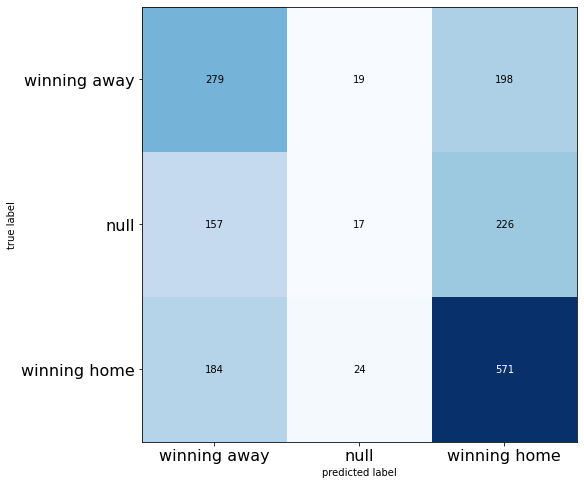

In [36]:
cm = confusion_matrix(Z_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), ["winning away","null",'winning home'], fontsize=16)
plt.yticks(range(3), ["winning away","null",'winning home'], fontsize=16)
plt.show()

In [37]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(X_train, Z_train)
dt_pred = dt_clf.predict(X_test)
dt_acc = metrics.accuracy_score(Z_test, dt_pred)
accuracy_list.append(100*dt_acc)

print('Decision Tree Classifier accuracy (in%): ', dt_acc*100)


Decision Tree Classifier accuracy (in%):  50.50746268656716


<Figure size 432x288 with 0 Axes>

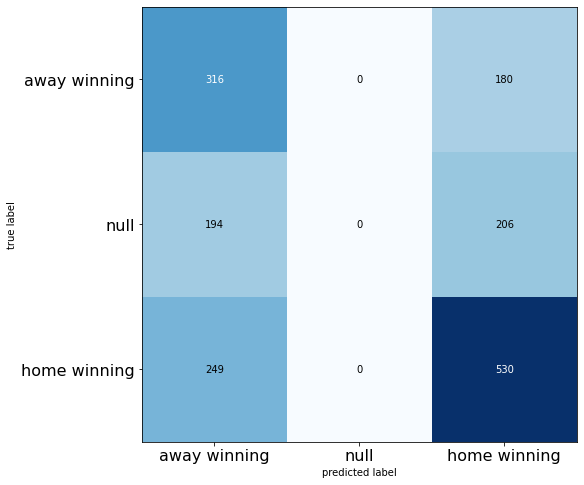

In [38]:
cm = confusion_matrix(Z_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.yticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.show()

In [39]:
gnb = GaussianNB()
gnb.fit(X_train, Z_train)
n_pred = gnb.predict(X_test)
n_acc = metrics.accuracy_score(Z_test, n_pred)
accuracy_list.append(100*n_acc)
print(n_acc)

0.4943283582089552


<Figure size 432x288 with 0 Axes>

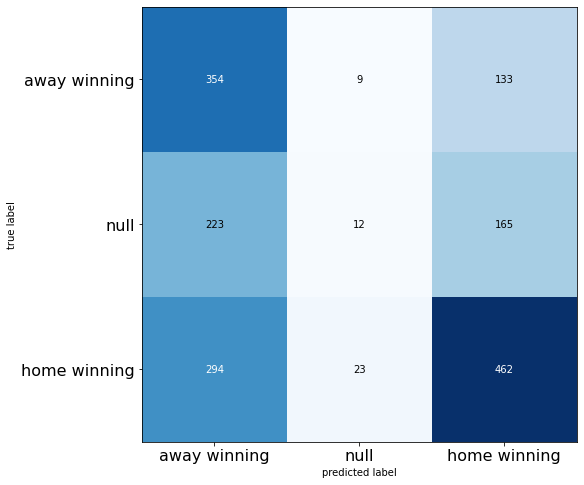

In [40]:
cm = confusion_matrix(Z_test, n_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.yticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.show()

In [41]:

# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=300)
kn_clf.fit(X_train, Z_train)
kn_pred = kn_clf.predict(X_test)
kn_acc = metrics.accuracy_score(Z_test, kn_pred)
accuracy_list.append(100*kn_acc)
print(kn_acc)

0.5194029850746269


<Figure size 432x288 with 0 Axes>

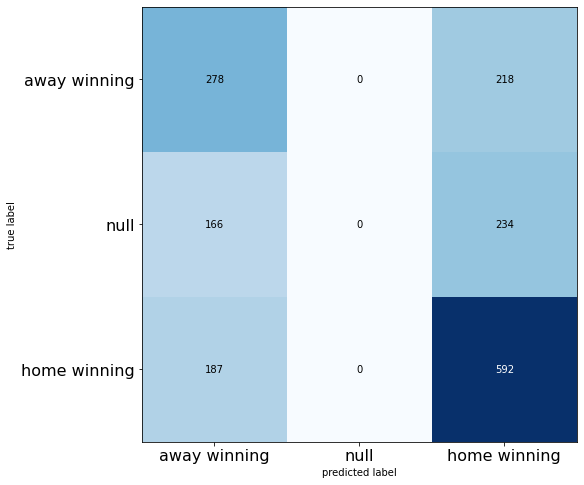

In [42]:
cm = confusion_matrix(Z_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.yticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.show()

In [43]:

# xgbrf classifier
xgb_clf = xgboost.XGBRFClassifier(max_depth=6, random_state=0,n_estimators=100)
xgb_clf.fit(X_train,Z_train)
xgb_pred = xgb_clf.predict(X_test)
xgb_acc = metrics.accuracy_score(Z_test, xgb_pred)
accuracy_list.append(100*xgb_acc)
print(100*xgb_acc)



/home/ahmedsta/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ahmedsta/.local/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:31:18] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
50.98507462686567


<Figure size 432x288 with 0 Axes>

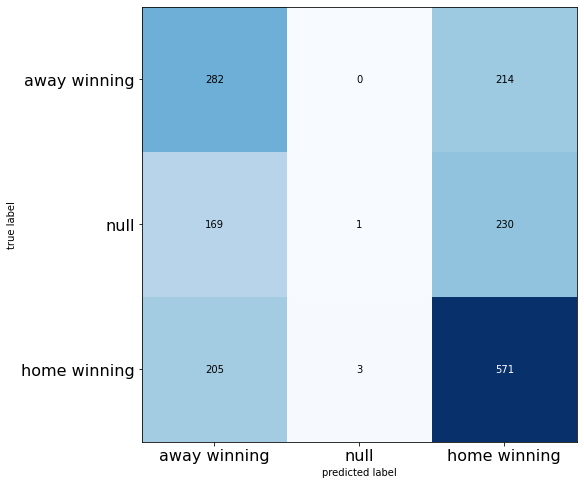

In [44]:
cm = confusion_matrix(Z_test, xgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.yticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.show()

In [45]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(X_train,Z_train)
gradientboost_pred = gradientboost_clf.predict(X_test)
gradientboost_acc = metrics.accuracy_score(Z_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc) 


<Figure size 432x288 with 0 Axes>

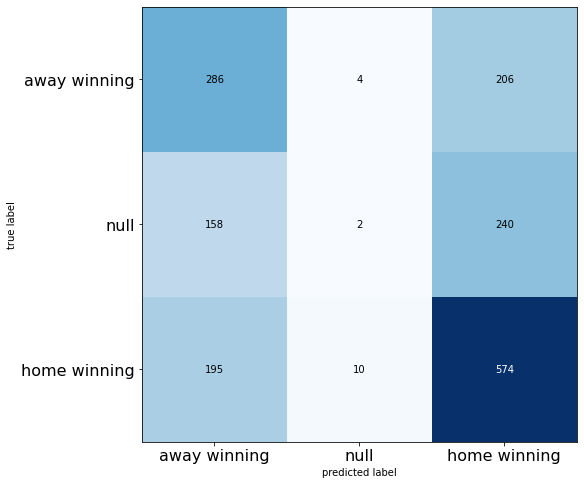

In [46]:
cm = confusion_matrix(Z_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.yticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.show()

In [47]:
# svc

sv_clf = SVC(C=0.05, kernel='rbf', degree=5, gamma='scale', coef0=0.01, shrinking=False, probability=False, 
             tol=0.001, cache_size=50, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
sv_clf.fit(X_train, Z_train)
sv_clf_pred = list(sv_clf.predict(X_test))
sv_clf_acc = metrics.accuracy_score(Z_test, sv_clf_pred)
accuracy_list.append((100*sv_clf_acc))
print('SVC accuracy (in%): ', sv_clf_acc*100)


SVC accuracy (in%):  51.582089552238806


<Figure size 432x288 with 0 Axes>

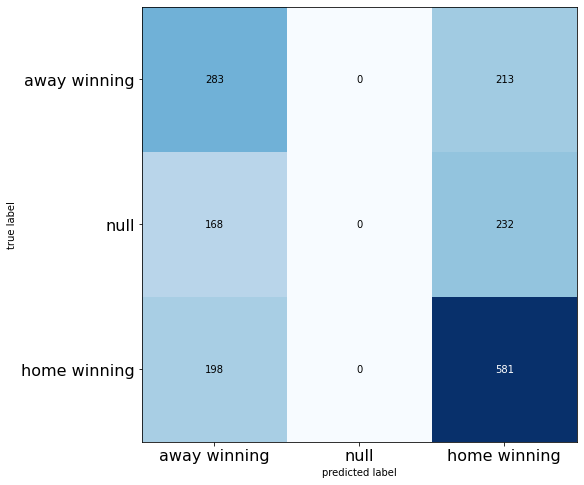

In [48]:
cm = confusion_matrix(Z_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.yticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.show()

In [ ]:
cm = confusion_matrix(Z_test, cat_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.yticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.show()

In [49]:
## adaboost

AB_clf = AdaBoostClassifier(n_estimators = 150,learning_rate=0.02)
AB_clf.fit(X_train,Z_train)
AB_pred = AB_clf.predict(X_test)
AB_acc = metrics.accuracy_score(Z_test, AB_pred)
print(AB_acc)





0.5104477611940299


<Figure size 432x288 with 0 Axes>

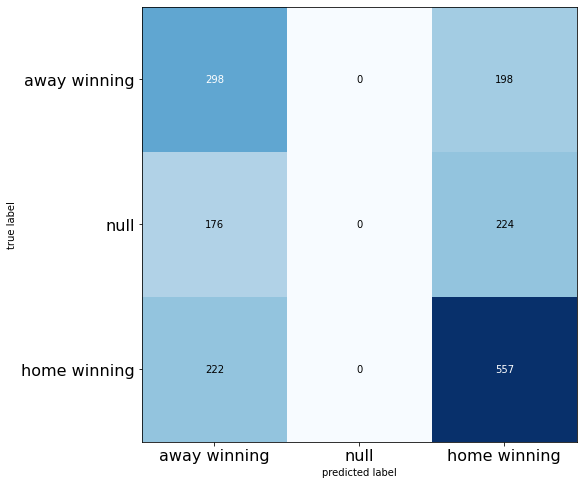

In [50]:
cm = confusion_matrix(Z_test, AB_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.yticks(range(3), ["away winning","null",'home winning'], fontsize=16)
plt.show()

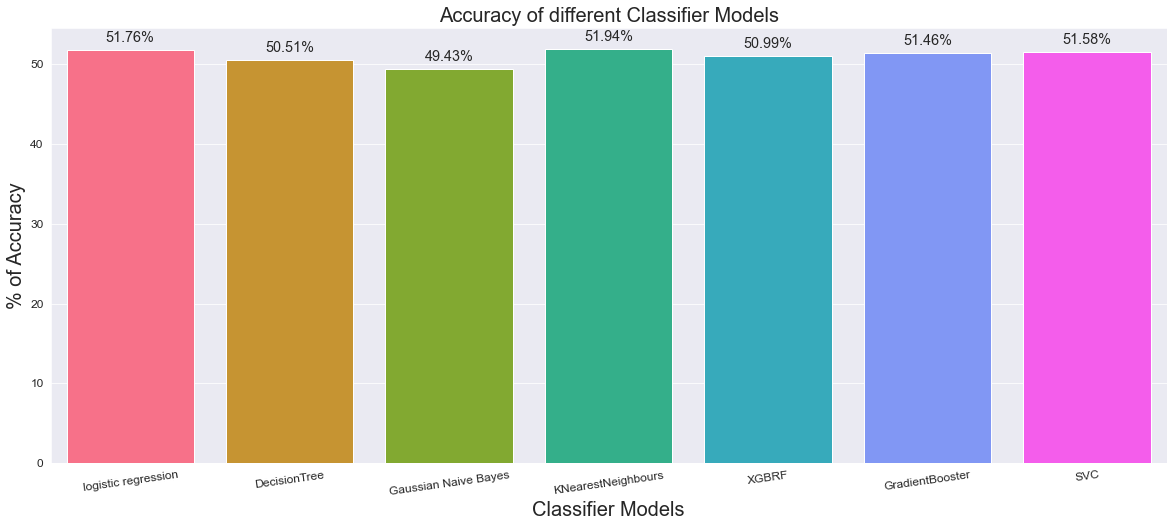

In [51]:
model_list = ['logistic regression','DecisionTree','Gaussian Naive Bayes','KNearestNeighbours', 
              'XGBRF','GradientBooster','SVC']
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()